In [ ]:
import pandas as pd
import numpy as np
# df = pandas.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
# df_sample = df.sample(frac=0.05)
# df_sample.to_csv('data/stability/base_seq.csv', index=False)
df = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
targets = df['target'].tolist()
print(len(targets))
print(np.mean(targets), np.median(targets), np.std(targets), np.max(targets), np.min(targets))

In [ ]:
import pandas as pd

def percentage_rank(nums, t):
    sorted_nums = sorted(nums)
    count = len(sorted_nums)
    
    if count == 0:
        return None  # Return None if the list is empty
    
    for i, num in enumerate(sorted_nums):
        if num >= t:
            return (i / count) * 100
    
    return 100

df = pd.read_csv('data/GFP/GFP_ground_truth_deduplicate.csv')
print(len(df))
ground_truth = df['target'].tolist()
print(percentage_rank(ground_truth, 0.885))

In [ ]:
df = pd.read_csv('logs/train_smooth_stability_2023_09_11__14_44_27/samples/seed_1.csv')
source_scores = df['source_scores'].values
mutant_scores = df['mutant_scores'].values
print(len(source_scores), len(mutant_scores))
print(np.mean(source_scores), np.median(source_scores), np.std(source_scores), np.max(source_scores), np.min(source_scores))
print(np.mean(mutant_scores), np.median(mutant_scores), np.std(mutant_scores), np.max(mutant_scores), np.min(mutant_scores))
(source_scores < mutant_scores).sum()

In [ ]:
df = pd.read_csv('logs/train_smooth_stability_2023_09_11__14_44_27/samples_20230913-144759/foldx_results.csv')
scores = df['ddg'].values
gt_csv = pd.read_csv('data/stability/base_seq.csv')
gt_scores = gt_csv['target'].values
print(np.mean(scores), np.median(scores), np.std(scores))
print(np.mean(gt_scores), np.median(gt_scores), np.std(gt_scores))

In [ ]:
x = 'abcd'
y = 'abde'
mut_site_indices = [i for i, aa in enumerate(y) if aa!= x[i]]
mut_site_indices

In [ ]:
import pandas as pd

sampled_data = pd.read_csv('logs/train_predictor_stability_2023_09_14__11_28_34_augment/samples_20230914-114542/foldx_results.csv')
sampleds_seqs = set(sampled_data['sequence'].tolist())
gt_data = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
gt_seqs = set(gt_data['sequence'].tolist())

print(len(sampleds_seqs.intersection(gt_seqs)))

In [ ]:
import pandas as pd

df = pd.read_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1.csv')
df['source_scores'] = df['source_scores_1']
df['mutant_scores'] = df['mutant_scores_1']
df.to_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1_fill_stability.csv')
df['source_scores'] = df['source_scores_2']
df['mutant_scores'] = df['mutant_scores_2']
df.to_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1_fill_GFP.csv')

In [ ]:
df['source_scores'] = df['source_scores_2']
df['mutant_scores'] = df['mutant_scores_2']

In [ ]:
df

In [ ]:
df.to_csv('logs/GWG_2_2023_09_19__11_40_04/samples_20230919-114004/seed_1_fillin_2_GFP.csv')

In [ ]:
import torch

ckpt = torch.load('logs/oracle_GFP_ggs/checkpoints/best_checkpoints.pt')
print(ckpt.keys())
# keys = list(ckpt.keys())
# for key in keys:
#     ckpt[key[10:]] = ckpt.pop(key)
# print(ckpt.keys())
# state_dict = ckpt['state_dict']
# torch.save(ckpt, 'logs/oracle_GFP_ggs/checkpoints/best_checkpoints.pt')

In [ ]:
import json
with open('data/foldx/cache.json') as f:
    a = json.load(f)
print(a, type(a))

In [ ]:
from pymoo.indicators.hv import HV
import numpy as np
from pymoo.problems import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()

# The result found by an algorithm
A = pf
print(A.shape)
# print(A)

ref_point = np.array([1.2, 1.2])

ind = HV(ref_point=ref_point)
print("HV", ind(A))
print("HV", ind(A * 10))

In [ ]:
import pandas as pd

df_GFP = pd.read_csv('data/GFP/GFP_ground_truth_deduplicate.csv')
df_stability = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
seqs_GFP = df_GFP['sequence'].tolist()
seqs_stability = df_stability['sequence'].tolist()
scores_GFP = df_GFP['target'].tolist()
scores_stability = df_stability['target'].tolist()
df = pd.DataFrame({'sequence': seqs_GFP, 
                   'GFP': scores_GFP,
                   'stability': scores_stability})
df.to_csv('data/ground_truth_GFP_stability.csv', index=False)

In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'seq': ['seq1', 'seq2', 'seq3', 'seq4'],
    'GFP': [1.5, -0.5, -1.5, 2.0],
    'stability': [0.5, 1.5, 2.5, 0.5]
})

# Filtering rows
filtered_df = df[(df['GFP'] < 0) & (df['stability'] > 1)]

print(filtered_df)


In [ ]:
import os

def foldx_runner(batch_idx, pdb_dir, pdb_file, mut_file, out_dir, num_runs=5):
    cmd = f'FoldX --command=BuildModel --pdb-dir={pdb_dir} --pdb={pdb_file} --output-dir={out_dir} --mutant-file={mut_file} --numberOfRuns={num_runs} --out-pdb=false --output-file=batch_{batch_idx}'
    # os.system(cmd)
    print(cmd)

batch_idx = 2
foldx_runner(batch_idx, 'data/foldx/outputs_af2', 'ref_seq_af2_Repair.pdb', f'tmp_foldx/tmp_2023-09-21_14-05-19/individual_list/individual_list_{batch_idx}.txt', 'tmp_foldx/tmp_2023-09-21_13-48-29', 2)

In [ ]:
import json

with open('data/all_seqs_list.json') as f:
    all_seqs_list = json.load(f)
print(len(all_seqs_list), len(all_seqs_list[0]))

In [ ]:
from Bio import SeqIO

records = SeqIO.parse('data/foldx/GFP_reference_seq_aa.fasta', 'fasta')
ref_seq = str(next(records).seq)
print(ref_seq, len(ref_seq))

In [ ]:
def sequence_differences(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Both sequences must be of the same length.")
    
    differences = []
    for i, (s1, s2) in enumerate(zip(seq1, seq2)):
        if s1 != s2:
            differences.append(f"{s1}{i+1}{s2}")
    
    differences = ';'.join(differences)
    
    return differences

all_seqs_difference = [sequence_differences(ref_seq, seq) for seq in all_seqs_list]
print(all_seqs_difference[:10], len(all_seqs_difference))

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

starting = pd.read_csv('data/GFP_stability_percentile_0.4.csv').sequence.tolist()
is_starting = [int(seq in starting) for seq in tqdm(all_seqs_list)]
print(sum(is_starting))
df = pd.DataFrame({'mutants': all_seqs_difference,
                   'seq': all_seqs_list, 
                   'starting': is_starting})
df.to_csv('data/GFP_stability_percentile_0.4_mutants.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from utils.eval import calc_hypervolume
import numpy as np
wt_GFP = 2.555
wt_GFP_normalized = 0.448
df = pd.read_csv('logs/GWG_2_2023_09_21__13_20_28_pareto/samples_20230921-132028/evaluation_results_2topk.csv')
scores1 = df['stability_normalized'].values
scores2 = 1 - df['GFP_normalized'].values
# scores1 = np.clip(scores1, 0, 1)
# scores2 = np.clip(scores2, 0, 1)
print(scores1.shape, scores2.shape)

r1, r2 = 1.0, 1.0
hv = calc_hypervolume(scores1, scores2, r1, r2)
print(hv)
plt.scatter(scores1, scores2, s=2)
plt.scatter([r1], [r2], c='r', marker='x')
plt.scatter([0], [1 - wt_GFP_normalized], c='r', marker='x')
plt.title('pareto')
plt.show()

In [ ]:
print(calc_hypervolume([0, 0.5], [0.5, 0], 1, 1))

In [ ]:
"SKGEELFTGVVPILVGLDGDVNGHKFSMSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLPYGVQRFSRYPDHDKQHGFFKSAMPEGYVQEGTIFFKDDGNYQTRAEVKFEGGTLVNRIELKGHDFKEDGNILGHKLEYNYNSHNVYIMADKQKDGIKVNFKIRHNIEDGSVQLADHYQQDTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDRMVLLEFVTAAGITHGMDEPYK" == "SKGEELFTGVVPILVGLDGDVNGHKFSMSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLPYGVQRFSRYPDHDKQHGFFKSAMPEGYVQEGTIFFKDDGNYQTRAEVKFEGGTLVNRIELKGHDFKEDGNILGHKLEYNYNSHNVYIMADKQKDGIKVNFKIRHNIEDGSVQLADHYQQDTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDRMVLLEFVTAAGITHGMDEPYK"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from utils.eval import calc_hypervolume

wt_GFP = 2.555
wt_GFP_normalized = 0.448

def draw_scatter_plot(csv_path, axs, title):
    df = pd.read_csv(csv_path)
    scores1 = df['stability'].values
    scores2 = df['GFP'].values
    # scores1 = np.clip(scores1, 0, 1)
    # scores2 = np.clip(scores2, 0, 1)
    # print(scores1.shape, scores2.shape)

    r1, r2 = 0, 0
    hv = calc_hypervolume(-scores1, -scores2, r1, r2)
    # print(hv)
    axs.scatter(scores1, scores2, s=2)
    axs.scatter([r1], [r2], c='r', marker='x')
    axs.text(r1, r2, 'ref', fontsize=8, ha='right')
    axs.scatter([68], [wt_GFP], c='r', marker='x')
    axs.text(68, wt_GFP, 'wt', fontsize=8, ha='left')
    axs.set_title(f'{title}, hv={hv:.3f}')
    axs.set_xlabel('-stability')
    axs.set_ylabel('GFP')
    
    return scores1.mean().item(), scores2.mean().item()

fig, axs = plt.subplots(2, 3, figsize=(9, 6))
avg_pts_x = []
avg_pts_y = []
legend = []
x, y = draw_scatter_plot('logs/GWG_2_2023_09_21__13_20_28_pareto/samples_20230921-132028/evaluation_results_2topk.csv', axs[0, 0], 'pareto')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('pareto')
x, y = draw_scatter_plot('logs_baseline/random_sample_GFP_2023_09_25__13_27_14_GFP/evaluation_results.csv', axs[0, 1], 'random on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('random on GFP')
x, y = draw_scatter_plot('logs_baseline/random_sample_stability_2023_09_25__14_16_39/evaluation_results.csv', axs[0, 2], 'random on stability')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('random on stability')
x, y = draw_scatter_plot('logs_baseline/simulated_annealing_GFP_2023_09_26__11_44_41/evaluation_results.csv', axs[1, 0], 'sa on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('sa on GFP')
x, y = draw_scatter_plot('logs_baseline/simulated_annealing_stability_2023_09_26__11_51_21/evaluation_results.csv', axs[1, 1], 'sa on stability')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('sa on stability')
x, y = draw_scatter_plot('logs/train_smooth_GFP_2023_09_21__17_01_05_agument/samples_20230921-194739/evaluation_results.csv', axs[1, 2], 'GWG+smooth on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('GWG+smooth on GFP')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
plt.figure(figsize=(8, 6), dpi=100)
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_pts_x)))
plt.scatter(avg_pts_x, avg_pts_y, color=colors)
for i, txt in enumerate(legend):
    plt.annotate(txt, (avg_pts_x[i], avg_pts_y[i]), fontsize=9, ha='right', va='bottom')
plt.xlabel('stability')
plt.ylabel('GFP')
plt.title('average fitness')

plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

gt_GFP_stability = pd.read_csv('data/ground_truth_GFP_stability_old.csv')
print(len(gt_GFP_stability))
print(gt_GFP_stability.head())
new_stability = pd.read_csv('data/stability/Stability_foldx_deduplicate_new.csv')
print(len(new_stability))
print(new_stability.head())
print(gt_GFP_stability['sequence'].tolist() == new_stability['sequence'].tolist())
gt_GFP_stability['stability'] = new_stability['target']
gt_GFP_stability.to_csv('data/ground_truth_GFP_stability.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/GFP_stability_percentile_0.2_0.4.csv')
data.head()
stability = data['stability'].tolist()
print(np.mean(stability), np.median(stability), np.std(stability), np.max(stability), np.min(stability))
GFP = data['GFP'].tolist()
print(np.mean(GFP), np.median(GFP), np.std(GFP), np.max(GFP), np.min(GFP))

In [ ]:
import pandas as pd

df = pd.read_csv('./logs_baseline_new/mala_approx_stability_2023_10_01__17_51_27/samples_seed_42.csv')
df = df.drop_duplicates(subset=['mutant_sequences'])
len(df)

In [ ]:
import pandas as pd

df = pd.read_csv('data/GFP_stability_percentile_0.2_0.4.csv')
stability = df['stability'].values
gt = pd.read_csv('data/ground_truth_GFP_stability.csv')
gt_stability = gt['stability'].values
gt_min, gt_max = gt_stability.min(), gt_stability.max()
print(gt_min, gt_max)
normalized_stability = (stability - gt_min) / (gt_max - gt_min)
print(normalized_stability)
print(normalized_stability.mean(), normalized_stability.max(), normalized_stability.min())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from utils.eval import calc_hypervolume
import numpy as np

def get_point(metric_csv_path, column='median_fitness'):
    df = pd.read_csv(metric_csv_path)
    metrics = df[column].tolist()[-2:]
    x, y = metrics[0], metrics[1]
    return x, y

labels = ['1.8_0.2', '1.5_0.5', '1.0_1.0', '0.5_1.5', '0.2_1.8', 'average', 'GWG_GFP', 'GWG_stable',  'adalead_GFP', '0.8_1.2',
          '1.2_0.8', '0.9_1.1', '1.1_0.9']
csv_path_list = ['./logs_new/GWG_2_2023_10_03__10_02_12_weight_1.8_0.2/samples_20231003-100212/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__09_45_59_weight_1.5_0.5/samples_20231003-094559/evaluation_metrics_nested_selection.csv',
                 'logs_new/GWG_2_2023_09_30__16_13_27/samples_20230930-161327/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__09_46_26_weight_0.5_1.5/samples_20231003-094626/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__10_02_40_weight_0.2_1.8/samples_20231003-100240/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_01__10_37_47_avg_lambda_6/samples_20231001-103747/evaluation_metrics_nested_selection.csv',
                 'logs_new/train_smooth_GFP_2023_09_30__13_34_58/samples_20230930-135740/evaluation_metrics.csv',
                 'logs_new/train_predictor_stability_0.2_0.4_2023_09_30__10_43_49/samples_20230930-104911/evaluation_metrics.csv',
                #  'logs_baseline_new/random_sample_GFP_2023_10_01__12_07_24_0.2_0.4/evaluation_metrics_single_task.csv',
                #  'logs_baseline_new/random_sample_stability_2023_10_01__12_07_34_0.2_0.4/evaluation_metrics_single_task.csv',
                 'logs_baseline_new/adalead_GFP_2023_10_02__16_52_36/evaluation_metrics_single_task.csv',
                 './logs_new/GWG_2_2023_10_03__11_25_16_weight_0.8_1.2/samples_20231003-112516/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__11_24_40_weight_1.2_0.8/samples_20231003-112440/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__12_02_37_weight_0.9_1.1/samples_20231003-120237/evaluation_metrics_nested_selection.csv',
                 './logs_new/GWG_2_2023_10_03__12_03_03_weight_1.1_0.9/samples_20231003-120303/evaluation_metrics_nested_selection.csv',]
points = [get_point(csv_path) for csv_path in csv_path_list]
stability_scores, GFP_scores = zip(*points)
# print(stability_scores)
# print(GFP_scores)
reverse_stability_scores = np.array(stability_scores)
GFP_scores = np.array(GFP_scores)

plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(reverse_stability_scores, GFP_scores, s=12)

for i in range(len(labels)):
    plt.annotate(labels[i], (reverse_stability_scores[i], GFP_scores[i]), fontsize=9, xytext=(reverse_stability_scores[i]-0.3, GFP_scores[i]+0.02))

plt.xlabel('stability')
plt.ylabel('GFP fitness')
plt.show()


In [ ]:
import pandas as pd

df  = pd.read_csv('data/gb1/four_mutations_full_data.csv')
selected = pd.DataFrame({'sequence': df['sequence'],
                         'target': df['Fitness']})
selected.to_csv('data/gb1/ground_truth_gb1.csv', index=False)

In [ ]:
wt = 'MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTELEVLFQGPLDPNSMATYEVLCEVARKLGTDDREVVLFLLNVFIPQPTLAQLIGALRALKEEGRLTFPLLAECLFRAGRRDLLRDLLHLDPRFLERHLAGTMSYFSPYQLTVLHVDGELCARDIRSLIFLSKDTIGSRSTPQTFLHWVYCMENLDLLGPTDVDALMSMLRSLSRVDLQRQVQTLMGLHLSGPSHSQHYRHTPLEHHHHHH'
pdb = 'MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTELEVLFQGPLDPNSMATYEVLCEVARKLGTDDREVVLFLLNVFIPQPTLAQLIGALRALKEEGRLTFPLLAECLFRAGRRDLLRDLLHLDPRFLERHLAGTMSYFSPYQLTVLHVDGELCARDIRSLIFLSKDTIGSRSTPQTFLHWVYCMENLDLLGPTDVDALMSMLRSLSRVDLQRQVQTLMGLHLSGPSHSQHYRHTPLEHHHHHH'
print([s for s in wt])
print(len(wt))
print(wt[38], wt[39], wt[40], wt[53])

In [ ]:
import os

mut = 'VA39M,DA40D,GA41D,VA54V;'
root_dir = '/work/kerr/p450/mutation/results/GB1/foldx/all'
for i in range(16000):
    with open(os.path.join(root_dir, str(i), 'individual_list.txt')) as f:
        lines = f.read()
        if mut in lines:
            print(i)

In [ ]:
import pandas as pd
from collections import Counter

def get_duplicates(ll):
    elements_count = Counter(ll)
    duplicates = [k for k, v in elements_count.items() if v > 1]
    
    return duplicates

gb1 = pd.read_csv('data/gb1/ground_truth_gb1.csv')
gb1_seqs = gb1['sequence'].tolist()
print(len(gb1_seqs), len(set(gb1_seqs)))
gb1_targets = gb1['target'].tolist()
gb1_seq2target = dict(zip(gb1_seqs, gb1_targets))
ddg = pd.read_csv('data/gb1/ground_truth_ddg.csv')
ddg_seqs = ddg['sequence'].tolist()
print(len(ddg_seqs), len(set(ddg_seqs)))
ddg_targets = ddg['target'].tolist()
ddg_seq2target = dict(zip(ddg_seqs, ddg_targets))
print(f'ddg_seq2target: {len(ddg_seq2target)}')
duplicates = get_duplicates(ddg_seqs)
print(len(duplicates))
print(duplicates[:10])
print(len(set(gb1_seqs)))
print(set(gb1_seqs).intersection(set(ddg_seqs)))

In [ ]:
s = 'MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDDEWTYDDATKTFTVTELEVLFQGPLDPNSMATYEVLCEVARKLGTDDREVVLFLLNVFIPQPTLAQLIGALRALKEEGRLTFPLLAECLFRAGRRDLLRDLLHLDPRFLERHLAGTMSYFSPYQLTVLHVDGELCARDIRSLIFLSKDTIGSRSTPQTFLHWVYCMENLDLLGPTDVDALMSMLRSLSRVDLQRQVQTLMGLHLSGPSHSQHYRHTPLEHHHHHH'
s[38], s[39], s[40], s[53]
mut = 'VA39M,DA40D,GA41D,VA54V;'


In [ ]:
from Bio.PDB import PDBParser, is_aa
from Bio.SeqUtils import seq1

parser = PDBParser()
structure = parser.get_structure('data/gb1/5LDE_A.pdb', 'data/gb1/5LDE_A.pdb')
print(structure[0]['A'])
chain = structure[0]['A']
sequence = []
for res in chain:
    if is_aa(res, standard=True):
        sequence.append(seq1(res.get_resname()))
sequence = ''.join(sequence)
print(sequence)
print(len(sequence))


In [ ]:
import pandas as pd

df1 = pd.read_csv('data/gb1/ground_truth_ddg_part1.csv')
df2 = pd.read_csv('data/gb1/ground_truth_ddg_part2.csv')
df = pd.concat([df1, df2])
deduplicated = df.drop_duplicates(subset=['sequence'], keep='first')
len(deduplicated)
deduplicated.to_csv('data/gb1/ground_truth_ddg.csv', index=False)

In [ ]:
import pandas as pd
from collections import Counter

def get_duplicates(ll):
    elements_count = Counter(ll)
    duplicates = [k for k, v in elements_count.items() if v > 1]
    
    return duplicates

gb1 = pd.read_csv('data/gb1/ground_truth_gb1.csv')
gb1_seqs = gb1['sequence'].tolist()
print(len(gb1_seqs), len(set(gb1_seqs)))
gb1_targets = gb1['target'].tolist()
gb1_seq2target = dict(zip(gb1_seqs, gb1_targets))
ddg = pd.read_csv('data/gb1/ground_truth_ddg.csv')
ddg_seqs = ddg['sequence'].tolist()
print(len(ddg_seqs), len(set(ddg_seqs)))
ddg_targets = ddg['target'].tolist()
ddg_seq2target = dict(zip(ddg_seqs, ddg_targets))
print(f'ddg_seq2target: {len(ddg_seq2target)}')
duplicates = get_duplicates(ddg_seqs)
print(len(duplicates))
print(duplicates[:10])
print(len(set(gb1_seqs)))
print(set(gb1_seqs).intersection(set(ddg_seqs)))

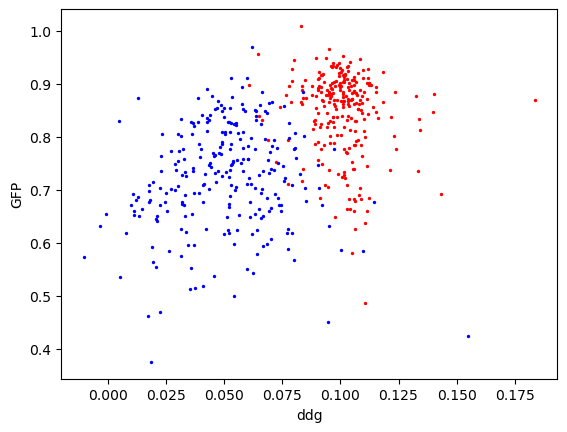

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('logs_new/GWG_2_2023_10_03__10_02_40_weight_0.2_1.8/samples_20231003-100240/evaluation_results_nested_selection.csv')
scores1_1 = df1['stability_normalized'].values
scores2_1 = df1['GFP_normalized'].values
plt.scatter(scores1_1, scores2_1, s=2, c='r')

df2 = pd.read_csv('logs_new/GWG_2_2023_10_03__10_02_12_weight_1.8_0.2/samples_20231003-100212/evaluation_results_nested_selection.csv')
scores1_2 = df2['stability_normalized'].values
scores2_2 = df2['GFP_normalized'].values
plt.scatter(scores1_2, scores2_2, s=2, c='b')

plt.xlabel('ddg')
plt.ylabel('GFP')

plt.show()